# Deepika kumari
Task 2 : Prediction using Unsupervised Machine Learning
GRIP@ The Sparks Foundation
In this task,we will use the iris dataset,to predict the optimum number of clusters.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
target_names = pd.DataFrame(iris.target,columns=["target"])
data=iris_df.join(target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Getting the Statistical Information
data.describe ()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [6]:
data.shape

(150, 5)

In [7]:
# Lets check for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


# Using Pairplots for better understanding of the data points distribution

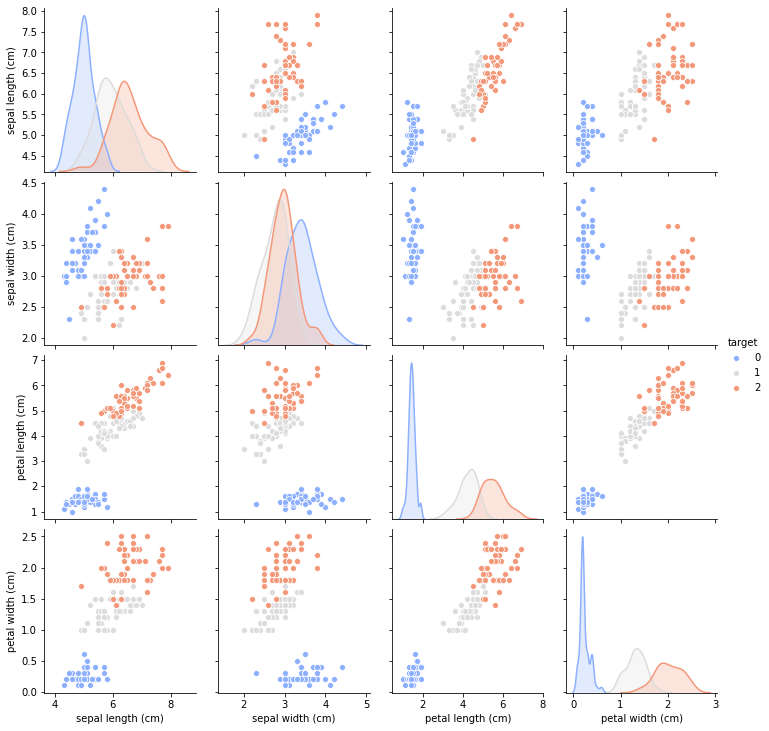

In [8]:
sns.pairplot(data,hue="target",palette="coolwarm")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'hue', 'palette'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


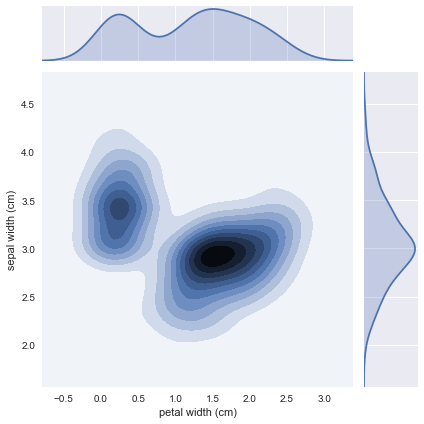

In [9]:
plt.style.use("seaborn")
sns.jointplot(x="petal width (cm)",y="sepal width (cm)",data=data,kind="kde",hue = data.target,palette="Dark2")

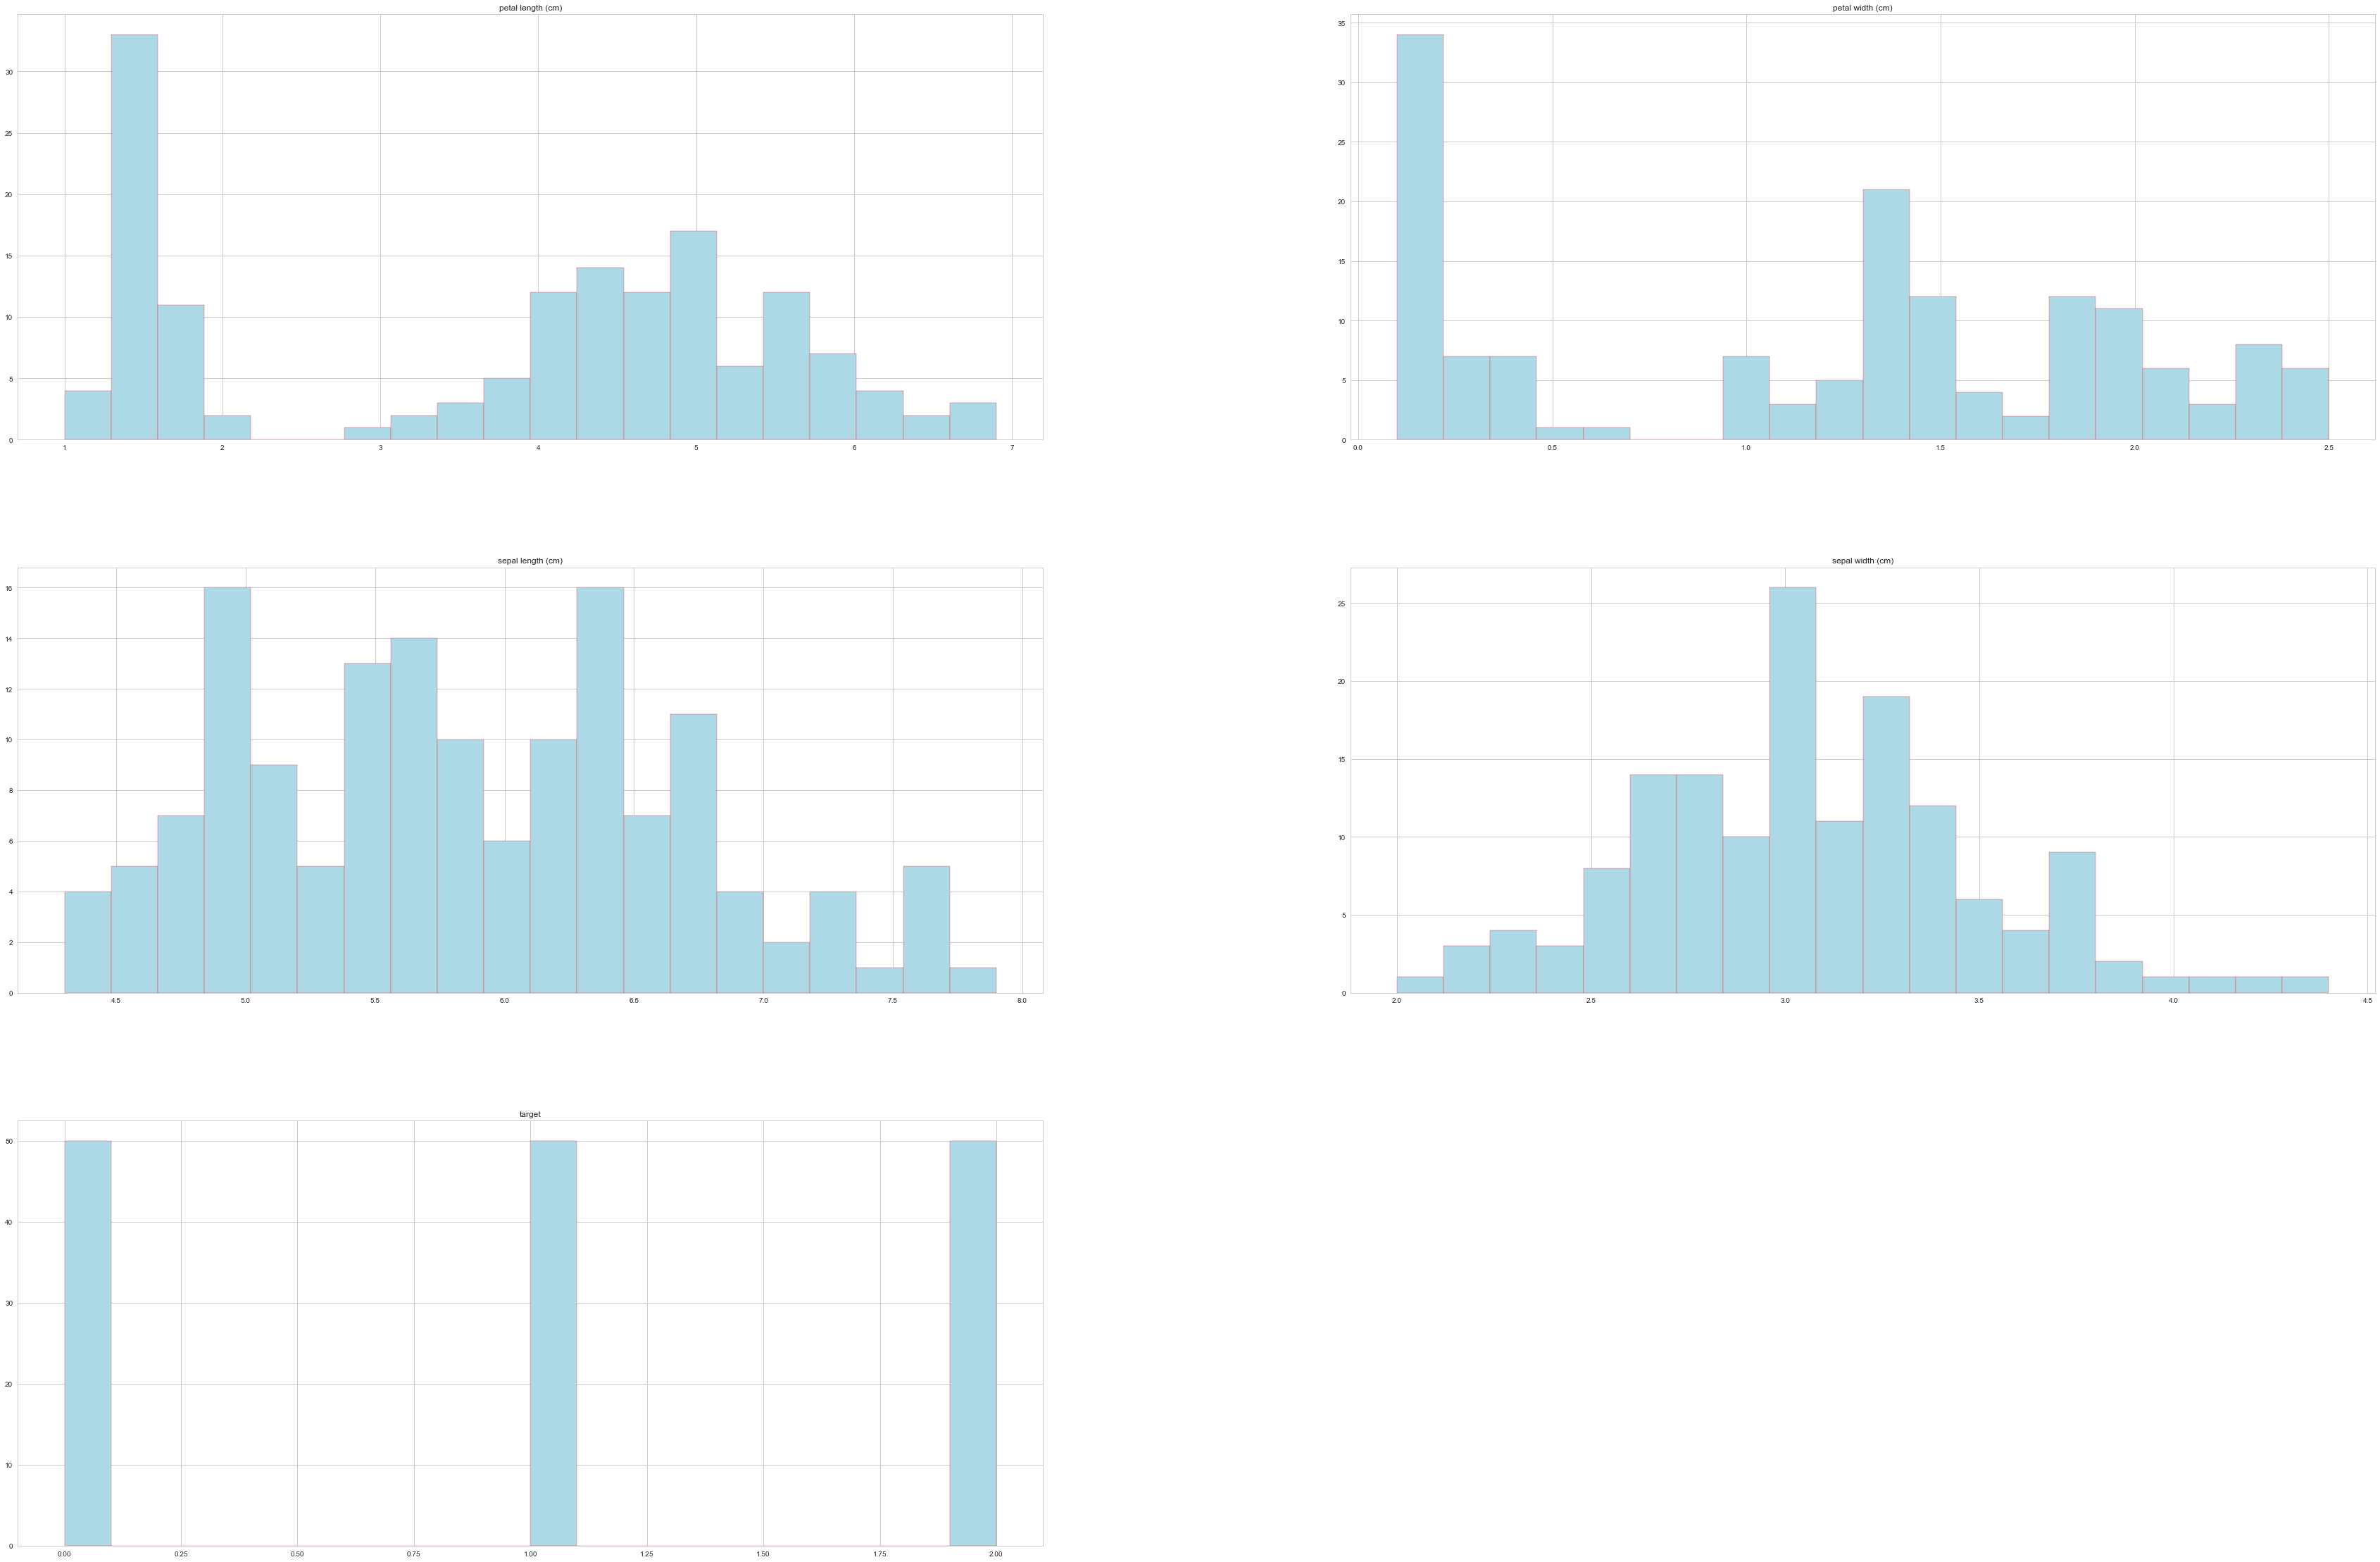

In [10]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

In [12]:
skewValue = data.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64


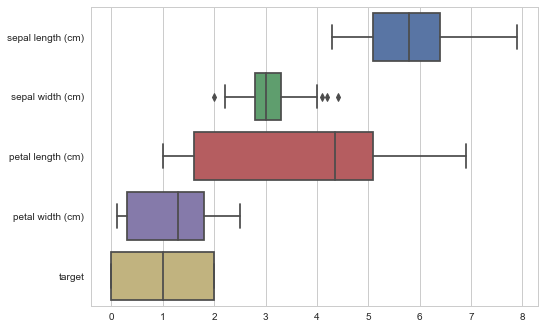

In [13]:
##Univariate Analysis Using Boxplot
##Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
ax = sns.boxplot(data=data, orient="h")

## Below snippet shows how we can find the optimum number of clusters for K Means and how can we determine the value of K?

In [15]:
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,:-1].values
#scaler = StandardScaler()
#transformed_values = scaler.fit_transform(X)

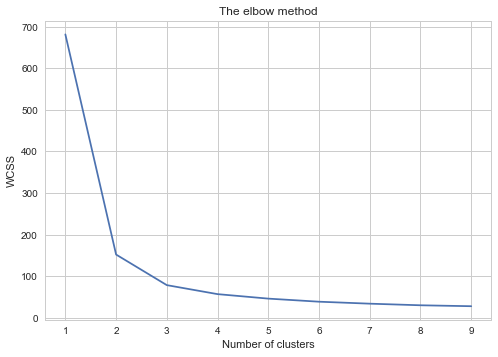

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  knn=KMeans(i)
  knn.fit(X)
  wcss.append(knn.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [17]:
knn = KMeans(3)
pred_y = knn.fit_predict(X)

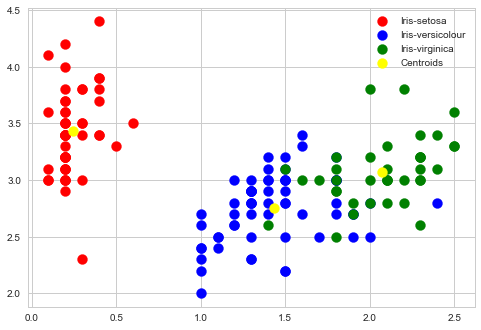

In [18]:
plt.scatter(X[pred_y == 0, 3], X[pred_y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred_y == 1, 3], X[pred_y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred_y == 2, 3], X[pred_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(knn.cluster_centers_[:, 3], knn.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()